## Exploratory Data Analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the data
data = pd.read_csv("../16_HP/outputs/simulation_results_nand.csv")

In [3]:
from analysis import *
import os

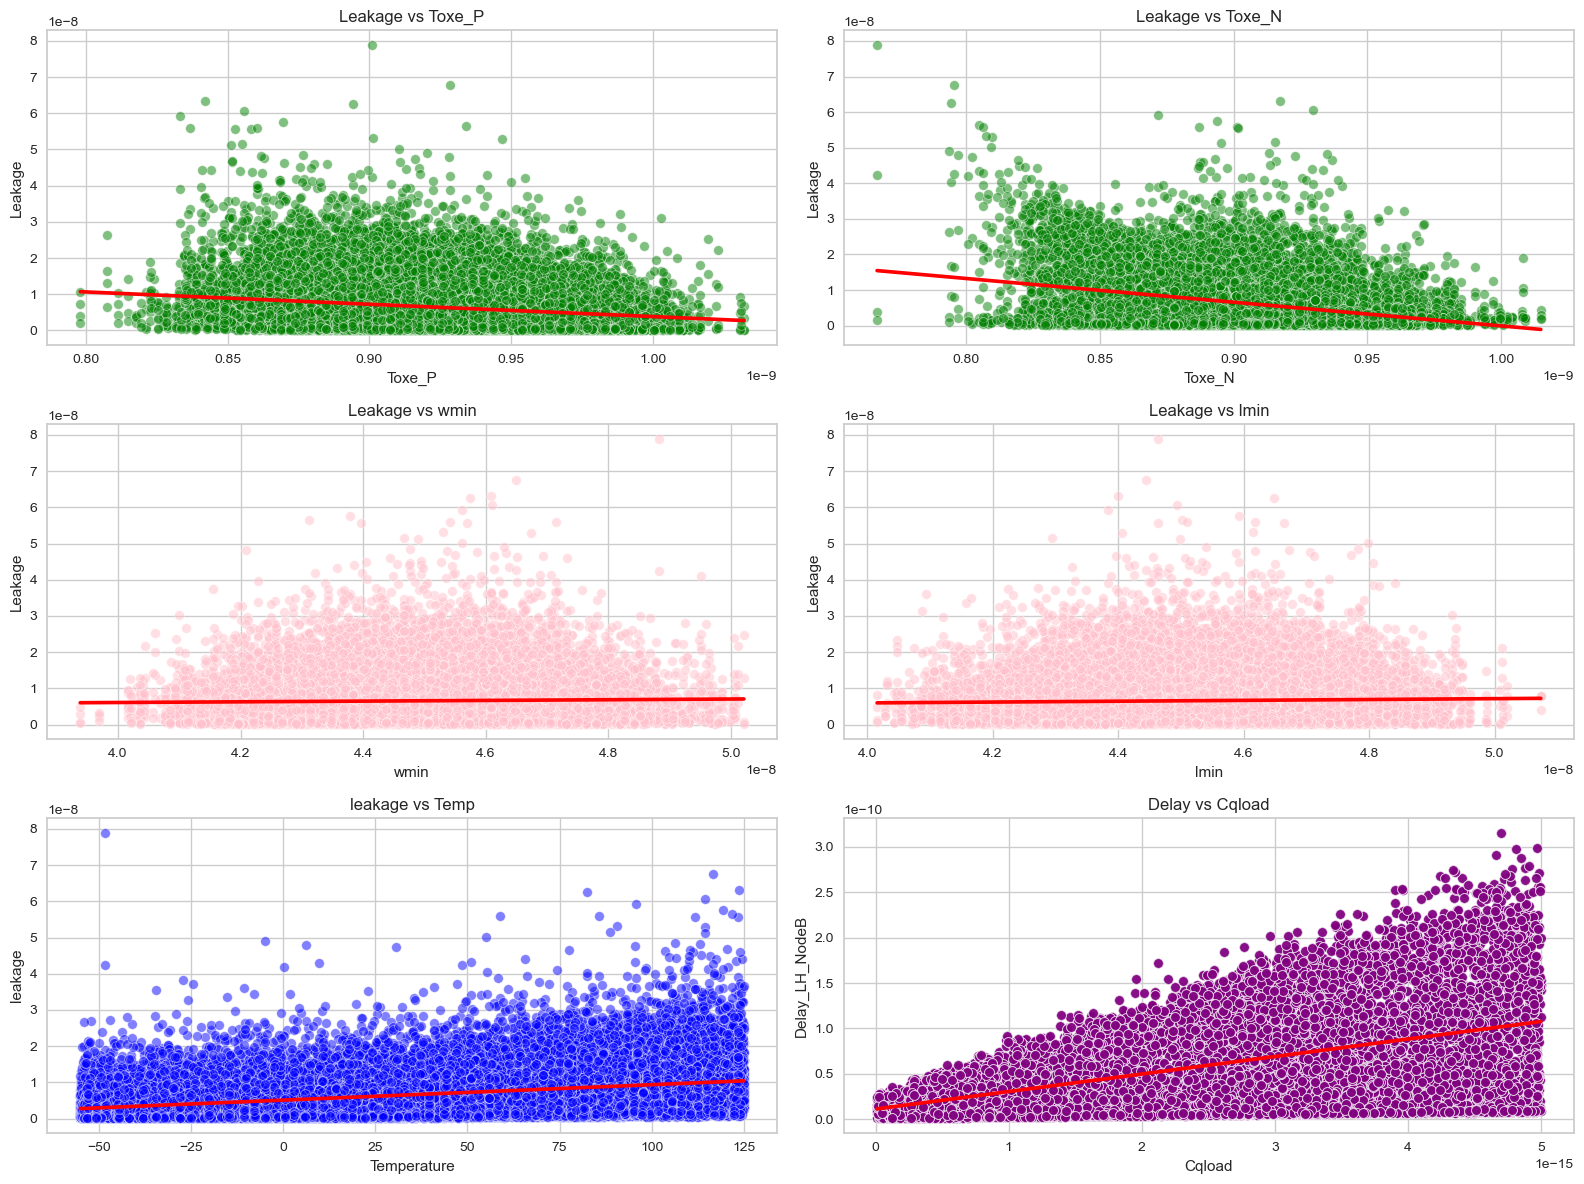

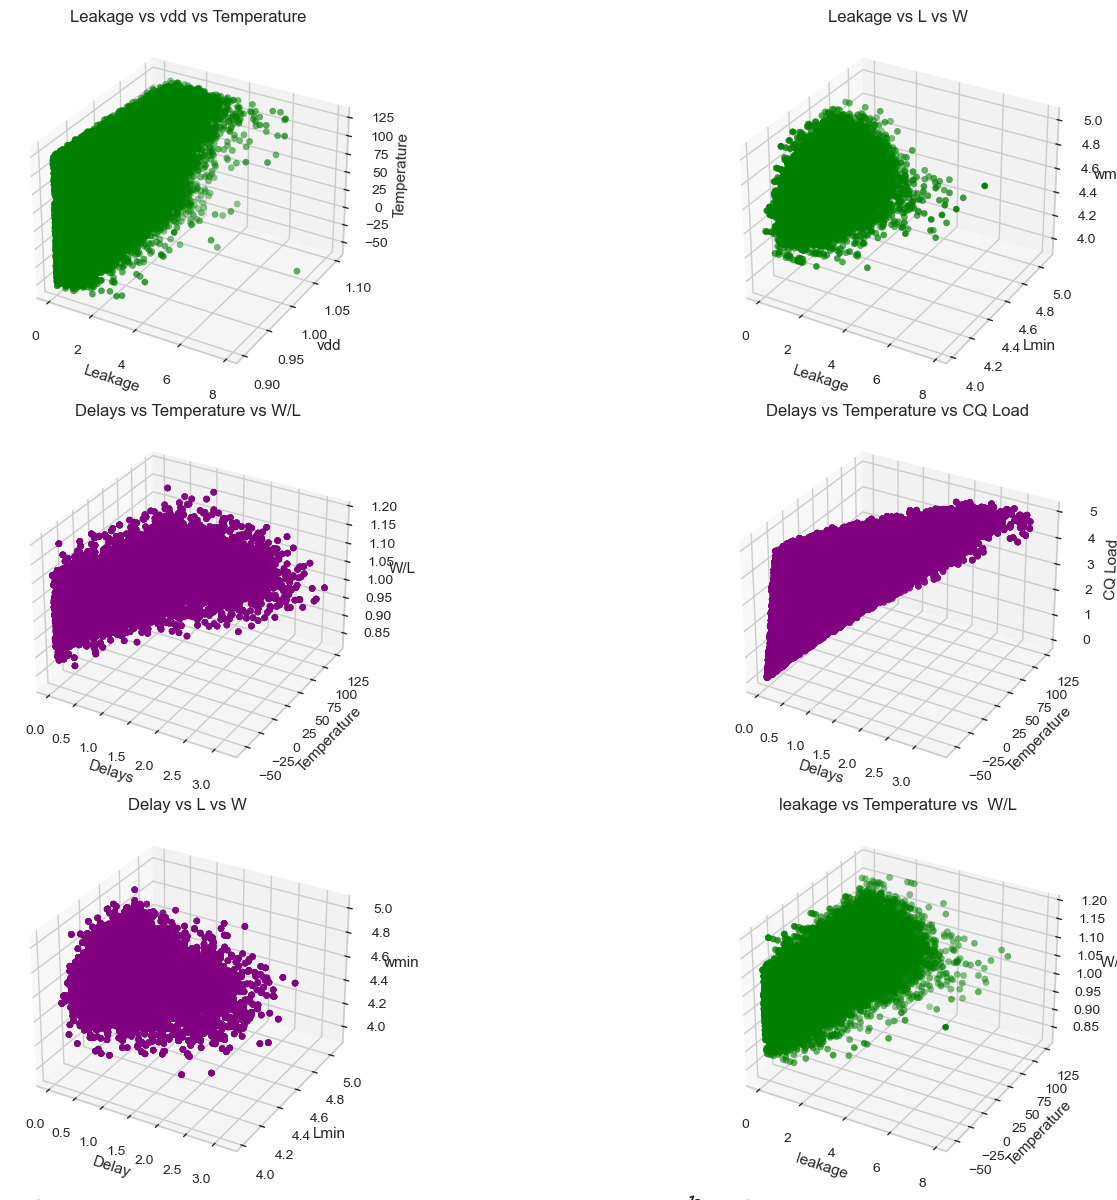

Explained Variance Ratio:
[0.21421475 0.07272421 0.04579438]


Most correlated columns with PCA Component 1:
PCA_1             1.000000
delay_LH_NodeA    0.991979
delay_LH_NodeB    0.991979
delay_HL_NodeA    0.990705
delay_HL_NodeB    0.990705
Name: PCA_1, dtype: float64

Most correlated columns with PCA Component 2:
PCA_2      1.000000
leakage    0.873421
Vin_B      0.538562
pvdd       0.474339
toxe_n     0.443734
Name: PCA_2, dtype: float64

Most correlated columns with PCA Component 3:
PCA_3       1.000000
toxe_p      0.515379
lmin        0.425747
toxp_par    0.385755
pvdd        0.366661
Name: PCA_3, dtype: float64


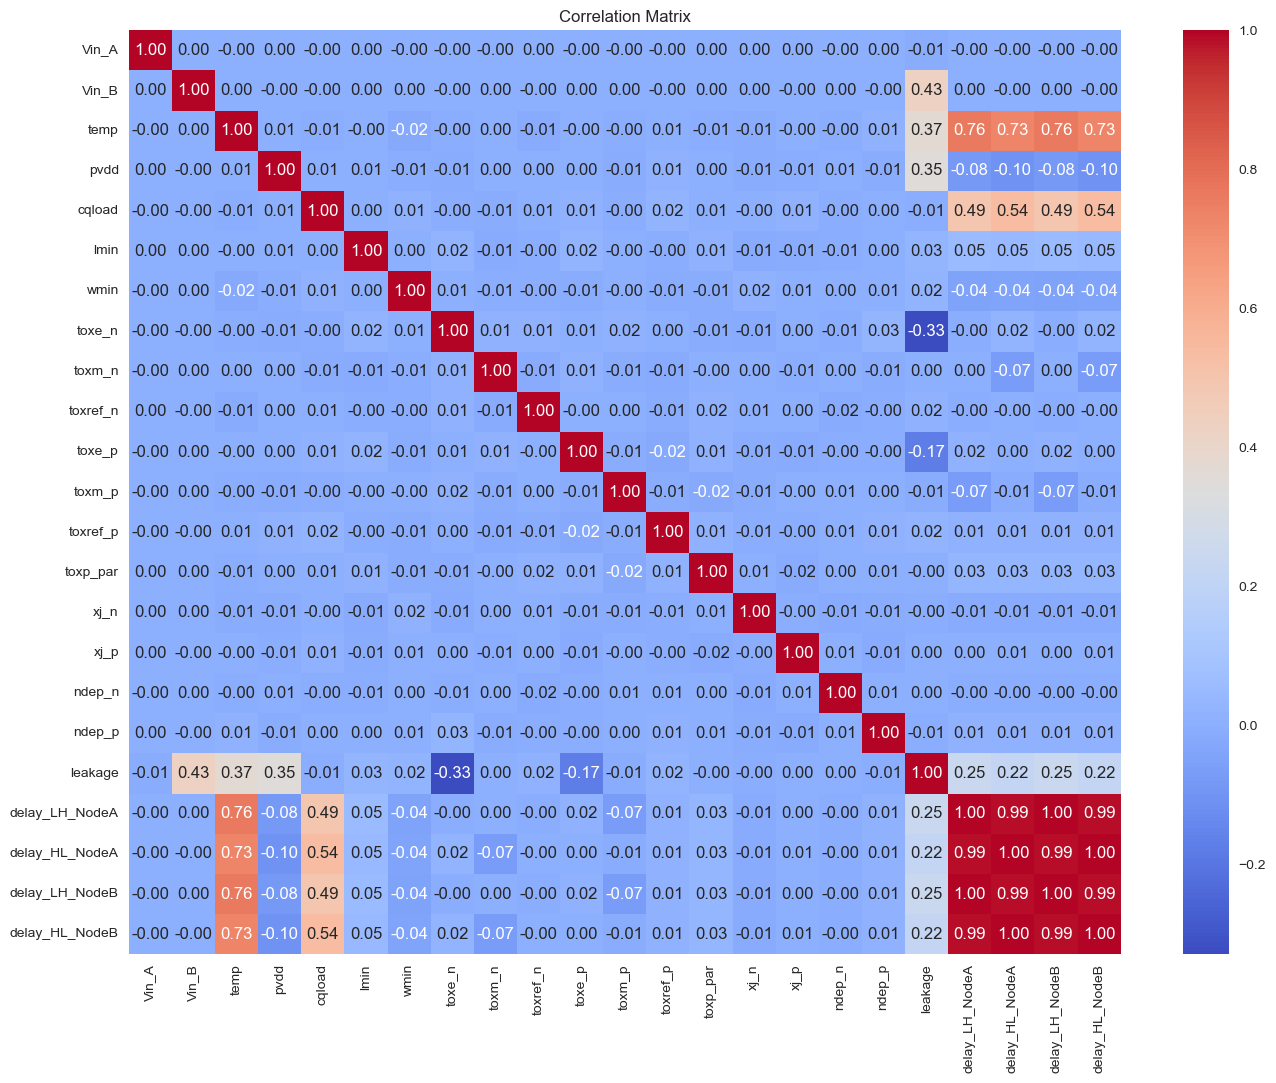

In [4]:
runEDA("../16_HP/outputs/simulation_results_nand.csv")

### Data Exploration

In [3]:
print("Column Names:", data.columns)

Column Names: Index(['Vin_A', 'Vin_B', 'temp', 'pvdd', 'cqload', 'lmin', 'wmin', 'toxe_n',
       'toxm_n', 'toxref_n', 'toxe_p', 'toxm_p', 'toxref_p', 'toxp_par',
       'xj_n', 'xj_p', 'ndep_n', 'ndep_p', 'leakage', 'delay_LH_NodeA',
       'delay_HL_NodeA', 'delay_LH_NodeB', 'delay_HL_NodeB'],
      dtype='object')


In [4]:
data.head()

Vin_A  Vin_B       temp      pvdd        cqload          lmin  \
0    0.0    0.0  43.786431  1.049654  1.992558e-16  4.422860e-08   
1    0.0    1.0  43.786431  1.049654  1.992558e-16  4.422860e-08   
2    1.0    0.0  43.786431  1.049654  1.992558e-16  4.422860e-08   
3    1.0    1.0  43.786431  1.049654  1.992558e-16  4.422860e-08   
4    0.0    0.0  73.734086  0.936041  1.703362e-15  4.468047e-08   

           wmin        toxe_n        toxm_n      toxref_n  ...      toxp_par  \
0  4.335549e-08  8.858098e-10  9.149308e-10  8.800085e-10  ...  6.400032e-10   
1  4.335549e-08  8.858098e-10  9.149308e-10  8.800085e-10  ...  6.400032e-10   
2  4.335549e-08  8.858098e-10  9.149308e-10  8.800085e-10  ...  6.400032e-10   
3  4.335549e-08  8.858098e-10  9.149308e-10  8.800085e-10  ...  6.400032e-10   
4  4.295989e-08  8.966653e-10  9.579161e-10  8.894931e-10  ...  6.536598e-10   

           xj_n          xj_p        ndep_n        ndep_p       leakage  \
0  1.438907e-08  1.434486e-08  6.530156e+18  2.751990e+18  5.776050e-09   
1  1.438907e-08  1.434486e-08  6.530156e+18  2.751990e+18  8.306314e-09   
2  1.438907e-08  1.434486e-08  6.530156e+18  2.751990e+18  2.874278e-09   
3  1.438907e-08  1.434486e-08  6.530156e+18  2.751990e+18  1.059093e-08   
4  1.335243e-08  1.435760e-08  6.696820e+18  2.698271e+18  2.026186e-09   

   delay_LH_NodeA  delay_HL_NodeA  delay_LH_NodeB  delay_HL_NodeB  
0    1.346507e-11    1.672417e-11    1.346507e-11    1.672417e-11  
1    1.346507e-11    1.672417e-11    1.346507e-11    1.672417e-11  
2    1.346507e-11    1.672417e-11    1.346507e-11    1.672417e-11  
3    1.346507e-11    1.672417e-11    1.346507e-11    1.672417e-11  
4    7.815279e-11    7.597429e-11    7.815279e-11    7.597429e-11  

[5 rows x 23 columns]

In [5]:
# Checking data types and missing values
print("\nDataset information:")
data.info()



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Vin_A           40000 non-null  float64
 1   Vin_B           40000 non-null  float64
 2   temp            40000 non-null  float64
 3   pvdd            40000 non-null  float64
 4   cqload          40000 non-null  float64
 5   lmin            40000 non-null  float64
 6   wmin            40000 non-null  float64
 7   toxe_n          40000 non-null  float64
 8   toxm_n          40000 non-null  float64
 9   toxref_n        40000 non-null  float64
 10  toxe_p          40000 non-null  float64
 11  toxm_p          40000 non-null  float64
 12  toxref_p        40000 non-null  float64
 13  toxp_par        40000 non-null  float64
 14  xj_n            40000 non-null  float64
 15  xj_p            40000 non-null  float64
 16  ndep_n          40000 non-null  float64
 17  ndep_p   

In [6]:
print("\nSummary statistics:")
data.describe()


Summary statistics:


Vin_A         Vin_B          temp          pvdd        cqload  \
count  40000.000000  40000.000000  40000.000000  40000.000000  4.000000e+04   
mean       0.500000      0.500000     34.362600      0.999048  2.511981e-15   
std        0.500006      0.500006     52.127050      0.058259  1.435116e-15   
min        0.000000      0.000000    -54.986959      0.900033  1.035900e-17   
25%        0.000000      0.000000    -10.844191      0.948592  1.256067e-15   
50%        0.500000      0.500000     33.830185      0.998653  2.520102e-15   
75%        1.000000      1.000000     79.692719      1.049947  3.755893e-15   
max        1.000000      1.000000    124.996031      1.099992  4.999631e-15   

               lmin          wmin        toxe_n        toxm_n      toxref_n  \
count  4.000000e+04  4.000000e+04  4.000000e+04  4.000000e+04  4.000000e+04   
mean   4.503877e-08  4.500441e-08  9.002687e-10  8.996303e-10  9.003235e-10   
std    1.493685e-09  1.485418e-09  2.972510e-11  3.026050e-11  2.993862e-11   
min    4.015305e-08  3.938417e-08  7.666010e-10  7.602014e-10  7.868514e-10   
25%    4.403489e-08  4.397007e-08  8.805222e-10  8.795919e-10  8.801323e-10   
50%    4.504623e-08  4.502020e-08  9.004051e-10  8.998323e-10  9.005850e-10   
75%    4.603464e-08  4.600447e-08  9.199819e-10  9.201116e-10  9.205995e-10   
max    5.073782e-08  5.021168e-08  1.014954e-09  1.014115e-09  1.011088e-09   

       ...      toxp_par          xj_n          xj_p        ndep_n  \
count  ...  4.000000e+04  4.000000e+04  4.000000e+04  4.000000e+04   
mean   ...  6.500293e-10  1.399542e-08  1.401062e-08  6.498297e+18   
std    ...  2.175375e-11  4.665974e-10  4.640081e-10  2.137011e+17   
min    ...  5.724874e-10  1.173568e-08  1.244580e-08  5.739411e+18   
25%    ...  6.354986e-10  1.368186e-08  1.369309e-08  6.352741e+18   
50%    ...  6.498078e-10  1.399949e-08  1.400450e-08  6.497865e+18   
75%    ...  6.647795e-10  1.431343e-08  1.431982e-08  6.641405e+18   
max    ...  7.428602e-10  1.579761e-08  1.582100e-08  7.419051e+18   

             ndep_p       leakage  delay_LH_NodeA  delay_HL_NodeA  \
count  4.000000e+04  4.000000e+04    4.000000e+04    4.000000e+04   
mean   2.799952e+18  6.565090e-09    5.963423e-11    7.049752e-11   
std    9.311797e+16  6.020080e-09    5.601749e-11    5.880425e-11   
min    2.435456e+18  4.085348e-11    8.110990e-13    2.768506e-12   
25%    2.736722e+18  1.961178e-09    1.379780e-11    2.418833e-11   
50%    2.801193e+18  5.186954e-09    4.187586e-11    5.033095e-11   
75%    2.862151e+18  9.285932e-09    9.138689e-11    1.005993e-10   
max    3.151342e+18  7.896058e-08    3.156894e-10    3.333967e-10   

       delay_LH_NodeB  delay_HL_NodeB  
count    4.000000e+04    4.000000e+04  
mean     5.963423e-11    7.049752e-11  
std      5.601749e-11    5.880425e-11  
min      8.110990e-13    2.768506e-12  
25%      1.379780e-11    2.418833e-11  
50%      4.187586e-11    5.033095e-11  
75%      9.138689e-11    1.005993e-10  
max      3.156894e-10    3.333967e-10  

[8 rows x 23 columns]

### Data Cleaning

In [7]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Vin_A             0
Vin_B             0
temp              0
pvdd              0
cqload            0
lmin              0
wmin              0
toxe_n            0
toxm_n            0
toxref_n          0
toxe_p            0
toxm_p            0
toxref_p          0
toxp_par          0
xj_n              0
xj_p              0
ndep_n            0
ndep_p            0
leakage           0
delay_LH_NodeA    0
delay_HL_NodeA    0
delay_LH_NodeB    0
delay_HL_NodeB    0
dtype: int64


In [8]:
# Check for duplicates
print("Duplicates:", data.duplicated().sum())

Duplicates: 0


### Preprocessing

In [9]:
data['Vin_A'].unique()

array([0., 1.])

In [10]:
# convert to binary for pattern mining
data['Vin_A'] = data['Vin_A'].astype(int)
data['Vin_B'] = data['Vin_B'].astype(int)

In [11]:
# Check data types
print("\nData types after preprocessing:")
data.dtypes


Data types after preprocessing:


Vin_A               int64
Vin_B               int64
temp              float64
pvdd              float64
cqload            float64
lmin              float64
wmin              float64
toxe_n            float64
toxm_n            float64
toxref_n          float64
toxe_p            float64
toxm_p            float64
toxref_p          float64
toxp_par          float64
xj_n              float64
xj_p              float64
ndep_n            float64
ndep_p            float64
leakage           float64
delay_LH_NodeA    float64
delay_HL_NodeA    float64
delay_LH_NodeB    float64
delay_HL_NodeB    float64
dtype: object

#### Scaling

In [12]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [13]:
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

### Data Visualisation

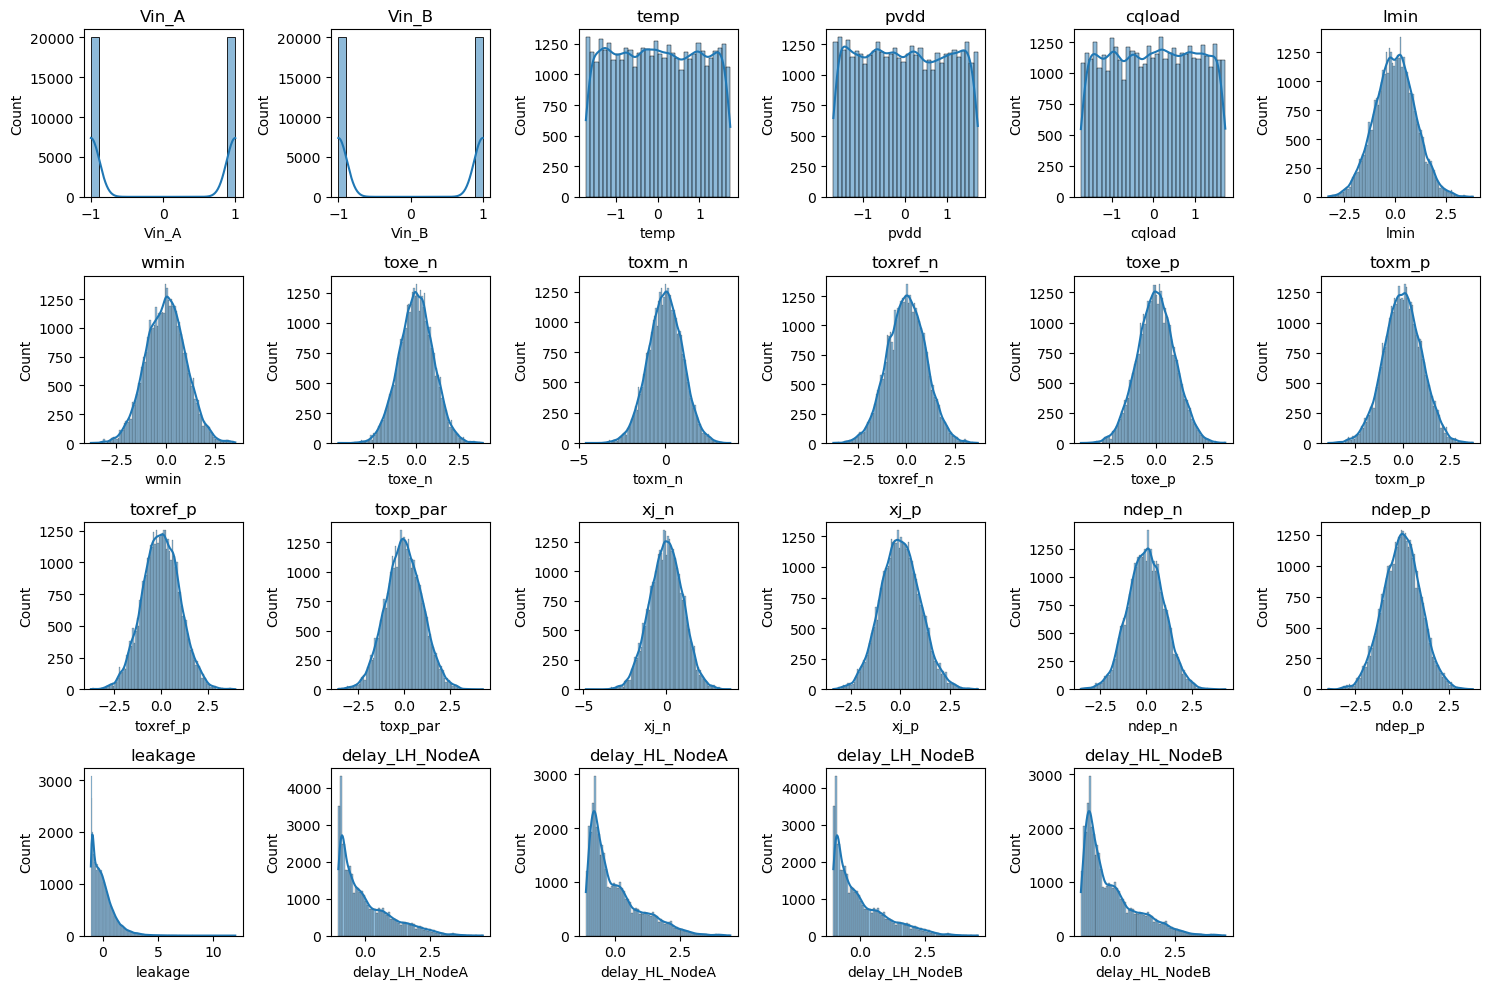

In [15]:
# Histograms of preprocessed scaled_data
plt.figure(figsize=(15, 10))
for i, column in enumerate(scaled_data.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(scaled_data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

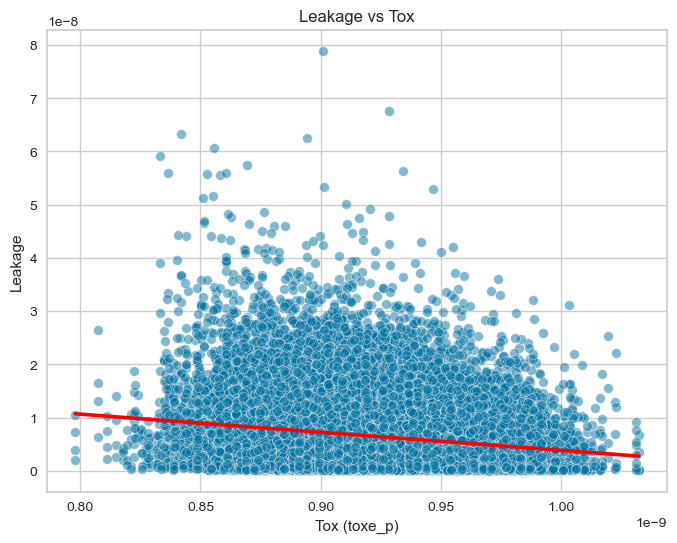

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='toxe_p', y='leakage', alpha=0.5)
sns.regplot(data=data, x='toxe_p', y='leakage', scatter=False, color='red')
plt.title('Leakage vs Tox')
plt.xlabel('Tox (toxe_p)')
plt.ylabel('Leakage')
plt.show()


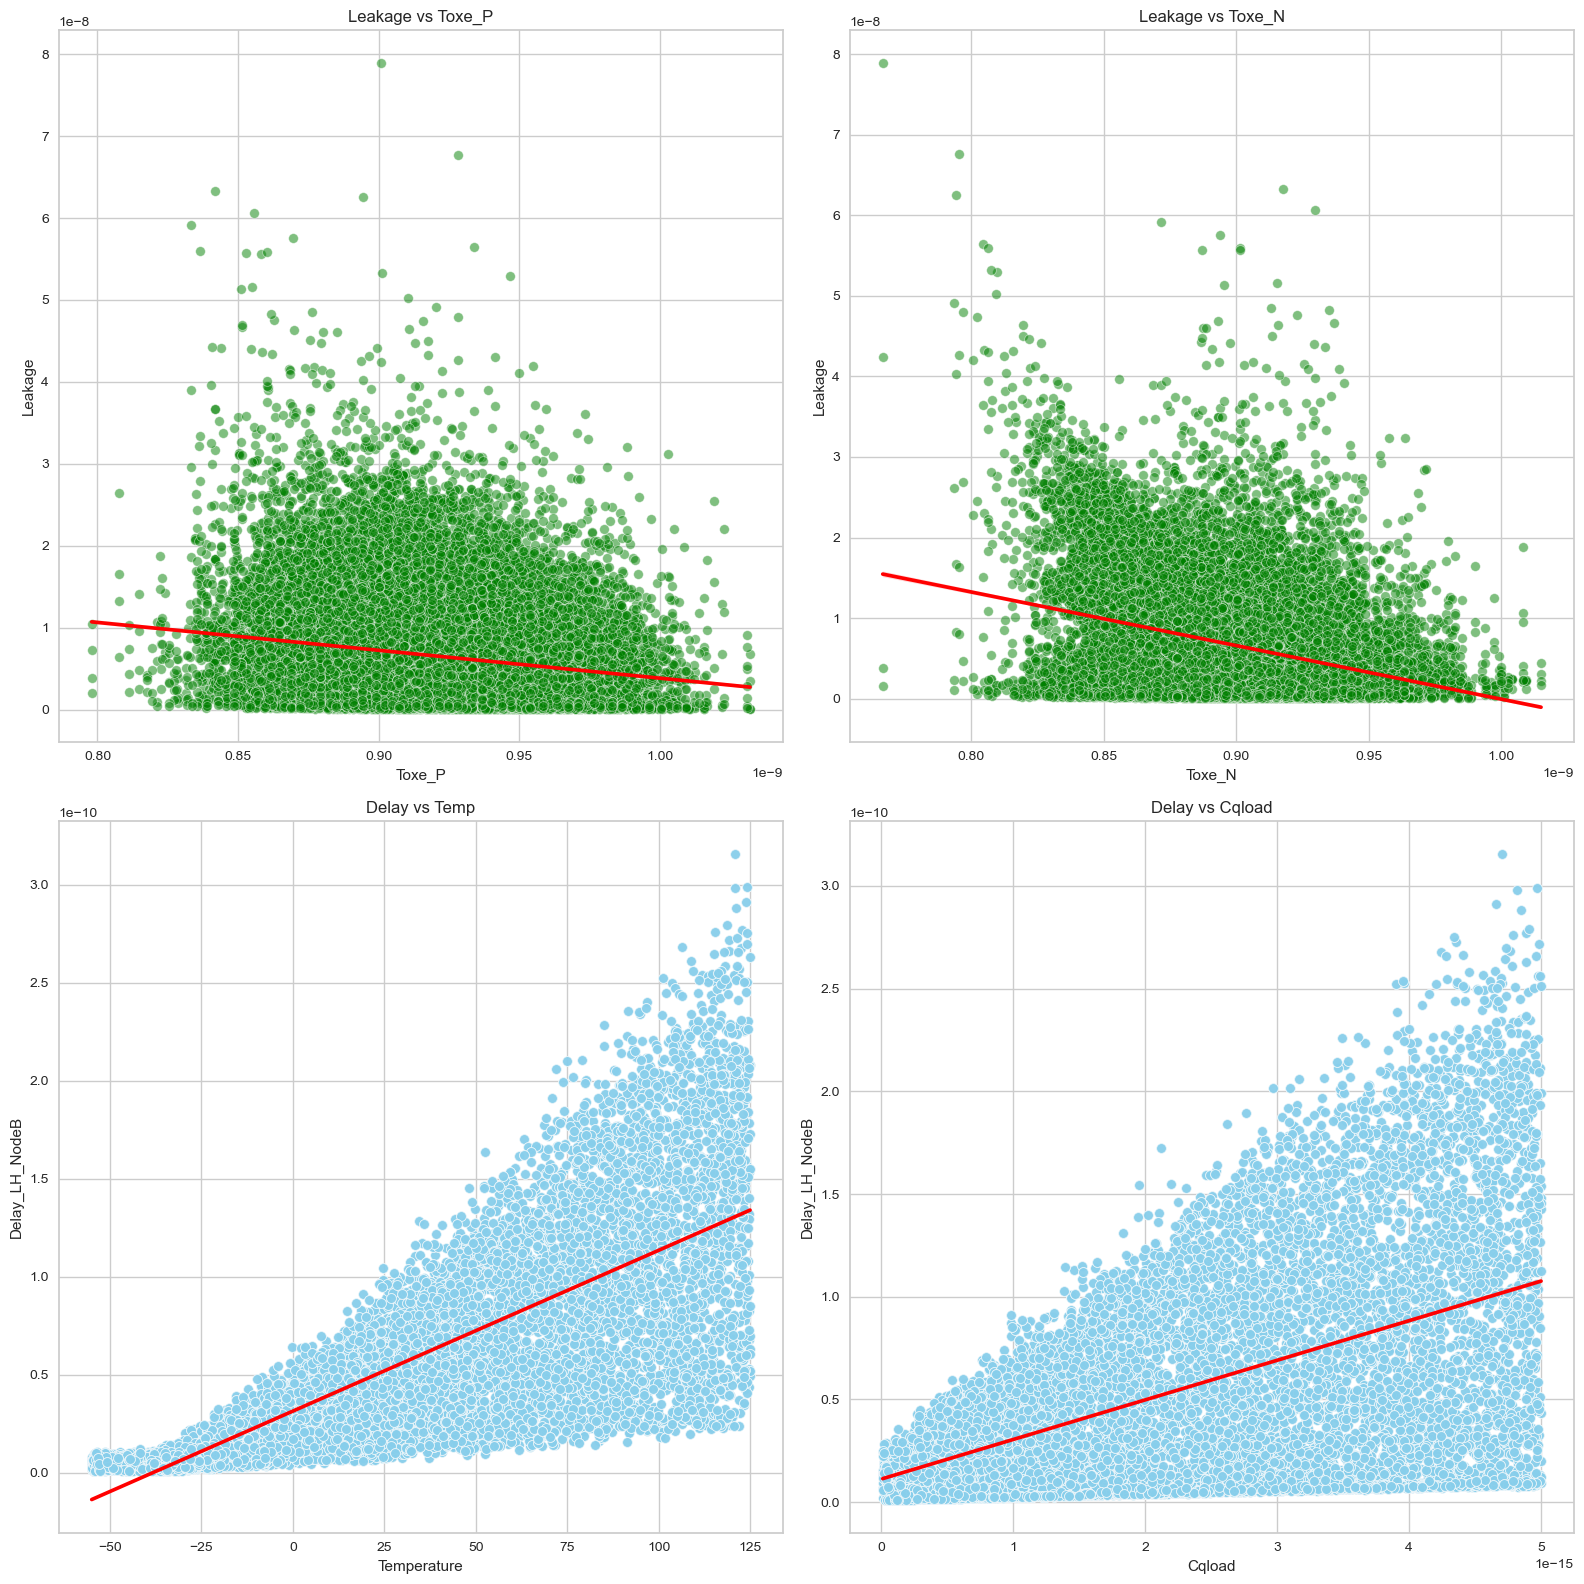

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the 4x4 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

# Scatter plot and regression line for leakage vs toxe_p
sns.scatterplot(data=data, x='toxe_p', y='leakage', alpha=0.5, ax=axs[0, 0], color='green')
sns.regplot(data=data, x='toxe_p', y='leakage', scatter=False, color='red', ax=axs[0, 0])
axs[0, 0].set_title('Leakage vs Toxe_P')
axs[0, 0].set_xlabel('Toxe_P')
axs[0, 0].set_ylabel('Leakage')

# Scatter plot and regression line for leakage vs toxe_n
sns.scatterplot(data=data, x='toxe_n', y='leakage', alpha=0.5, ax=axs[0, 1], color='green')
sns.regplot(data=data, x='toxe_n', y='leakage', scatter=False, color='red', ax=axs[0, 1])
axs[0, 1].set_title('Leakage vs Toxe_N')
axs[0, 1].set_xlabel('Toxe_N')
axs[0, 1].set_ylabel('Leakage')

# Scatter plot and regression line for delay vs temp
sns.scatterplot(data=data, x='temp', y='delay_LH_NodeB', alpha=0.5, ax=axs[1, 0], color = 'skyblue')
sns.regplot(data=data, x='temp', y='delay_LH_NodeB', scatter=False, color='red', ax=axs[1, 0])
axs[1, 0].set_title('Delay vs Temp')
axs[1, 0].set_xlabel('Temperature')
axs[1, 0].set_ylabel('Delay_LH_NodeB')

# Scatter plot and regression line for delay vs cqload
sns.scatterplot(data=data, x='cqload', y='delay_LH_NodeB', alpha=0.5, ax=axs[1, 1], color = 'skyblue')
sns.regplot(data=data, x='cqload', y='delay_LH_NodeB', scatter=False, color='red', ax=axs[1, 1])
axs[1, 1].set_title('Delay vs Cqload')
axs[1, 1].set_xlabel('Cqload')
axs[1, 1].set_ylabel('Delay_LH_NodeB')

plt.tight_layout()
plt.show()


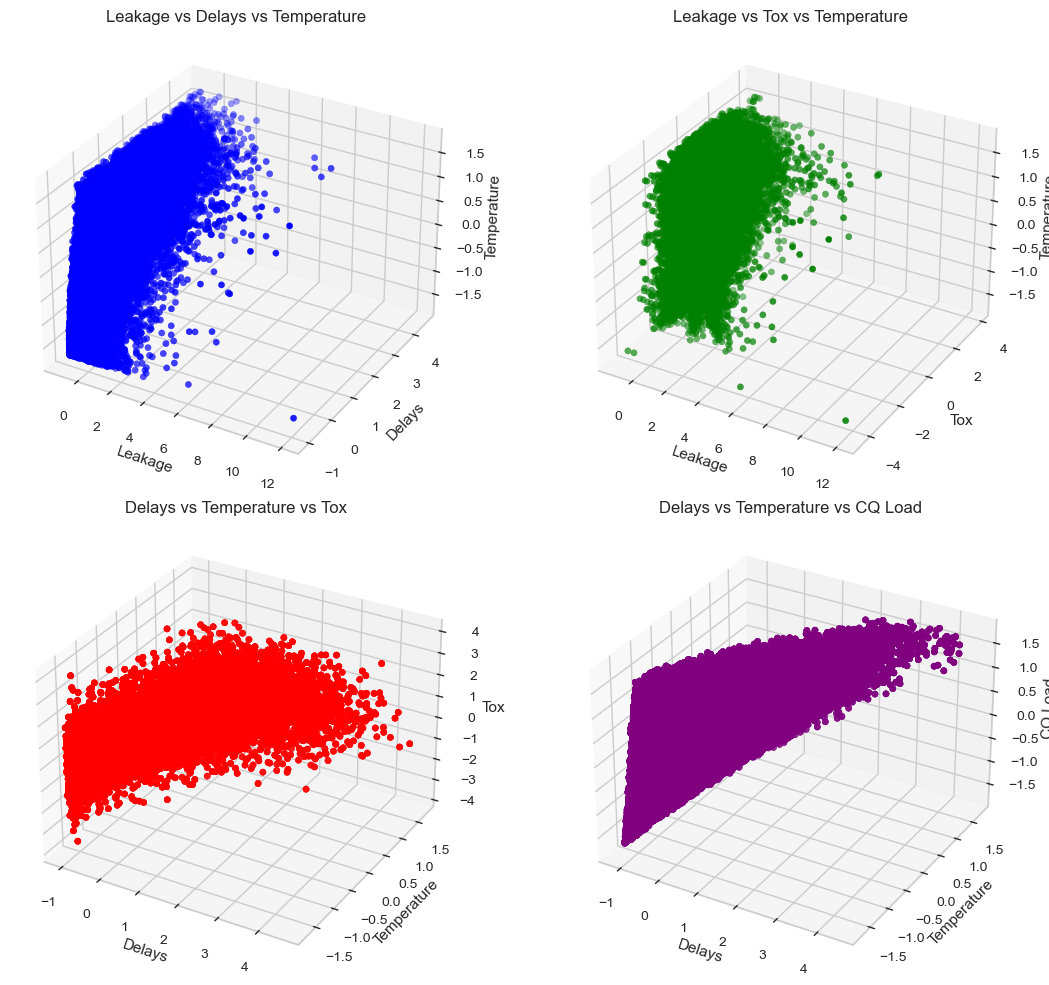

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and set of 3D axes
fig = plt.figure(figsize=(12, 10))

# 3D scatter plot: Leakage vs Delays vs temp
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(scaled_data['leakage'], scaled_data['delay_LH_NodeA'], scaled_data['temp'], c='blue')
ax1.set_xlabel('Leakage')
ax1.set_ylabel('Delays')
ax1.set_zlabel('Temperature')
ax1.set_title('Leakage vs Delays vs Temperature')

# 3D scatter plot: Leakage vs tox vs temp
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(scaled_data['leakage'], scaled_data['toxe_n'], scaled_data['temp'], c='green')
ax2.set_xlabel('Leakage')
ax2.set_ylabel('Tox')
ax2.set_zlabel('Temperature')
ax2.set_title('Leakage vs Tox vs Temperature')

# 3D scatter plot: Delays vs temp vs tox
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(scaled_data['delay_LH_NodeB'], scaled_data['temp'], scaled_data['toxref_p'], c='red')
ax3.set_xlabel('Delays')
ax3.set_ylabel('Temperature')
ax3.set_zlabel('Tox')
ax3.set_title('Delays vs Temperature vs Tox')

# 3D scatter plot: Delays vs temp vs cqload
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(scaled_data['delay_HL_NodeB'], scaled_data['temp'], scaled_data['cqload'], c='purple')
ax4.set_xlabel('Delays')
ax4.set_ylabel('Temperature')
ax4.set_zlabel('CQ Load')
ax4.set_title('Delays vs Temperature vs CQ Load')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Dimensionality Reduction

#### Principal Component Analysis (PCA): Reduce the dimensionality of the dataset while preserving most of the variance

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(scaled_data)

In [15]:
X_pca

array([[-1.92349738,  0.36403334, -0.4188674 ],
       [-1.83502445,  1.51078494, -0.50161875],
       [-1.99119602, -0.00832866, -0.33003456],
       ...,
       [ 3.22754294,  0.26654476,  0.32451873],
       [ 3.06955282, -1.26144446,  0.49614633],
       [ 3.26926436,  0.4282166 ,  0.41073913]])

In [16]:
pca_df = pd.DataFrame(data=X_pca, columns=[f'PCA_{i+1}' for i in range(X_pca.shape[1])])
pca_df.head()

PCA_1     PCA_2     PCA_3
0 -1.923497  0.364033 -0.418867
1 -1.835024  1.510785 -0.501619
2 -1.991196 -0.008329 -0.330035
3 -1.783360  1.720985 -0.415636
4  0.432765 -1.014725 -0.537184

In [17]:
# Print explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.21421473 0.07295832 0.04574157]


In [18]:
# Plotting 3D scatter plot using PCA results
from mpl_toolkits.mplot3d import Axes3D

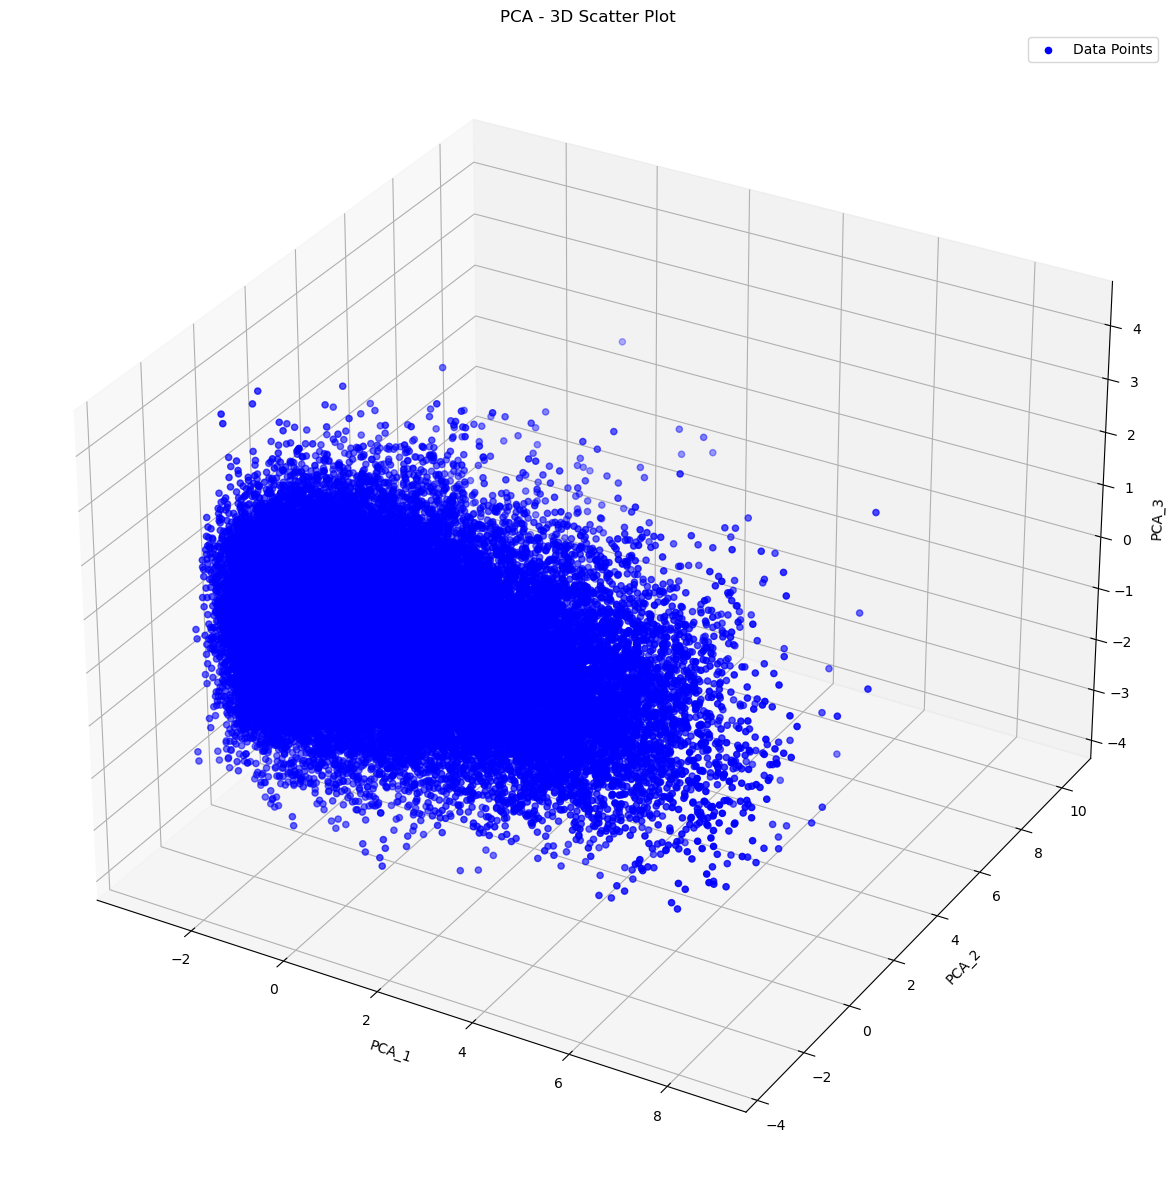

In [21]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Extract the reduced components
x = pca_df['PCA_1']
y = pca_df['PCA_2']
z = pca_df['PCA_3']

# Plot the data points
ax.scatter(x, y, z, c='blue', marker='o', label='Data Points')

# Set labels and title
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')
ax.set_title('PCA - 3D Scatter Plot')

ax.legend()
plt.show()

In [22]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PCA_1'], pca_df['PCA_1'], pca_df['PCA_3'], c=scaled_data['temp'], cmap='viridis')
ax.set_title('PCA 3D Scatter Plot')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.colorbar(scatter, label='Temperature')
plt.show()


In [29]:
%pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 269.4 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


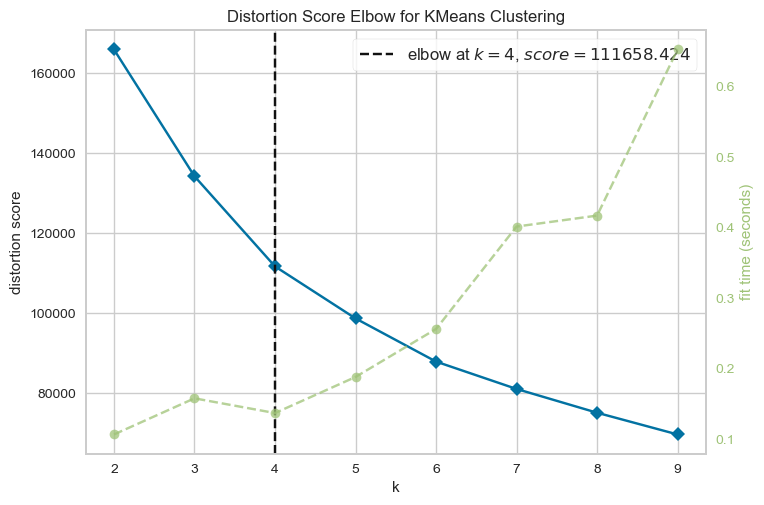

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Use the Yellowbrick library for a more interactive elbow plot
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
visualizer.fit(pca_df)
visualizer.show()


In [37]:
# Get the optimal number of clusters from the elbow plot
optimal_clusters = visualizer.elbow_value_
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_df) 
pca_df['Cluster'] = cluster_labels

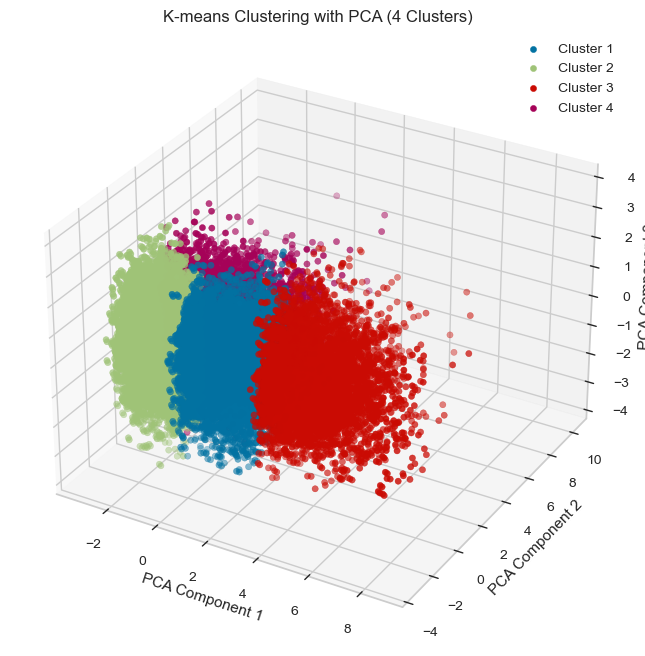

In [38]:
# Plot the clustered data in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in range(optimal_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    ax.scatter(cluster_data['PCA_1'], cluster_data['PCA_2'], cluster_data['PCA_3'], label=f'Cluster {cluster+1}')

ax.set_title(f'K-means Clustering with PCA ({optimal_clusters} Clusters)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.legend()
plt.show()

- There is a positive correlation between temperature and the first principal component. 

In [23]:
fig = plt.figure(figsize=(12, 8))

# Subplot 1
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(pca_df['PCA_1'], pca_df['PCA_2'], pca_df['PCA_3'], c=scaled_data['delay_HL_NodeA'], cmap='viridis')
ax1.set_title('PCA 3D Scatter Plot (delay_HL_NodeA)')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_zlabel('PCA Component 3')

# Subplot 2
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(pca_df['PCA_1'], pca_df['PCA_2'], pca_df['PCA_3'], c=scaled_data['delay_HL_NodeB'], cmap='viridis')
ax2.set_title('PCA 3D Scatter Plot (delay_HL_NodeB)')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_zlabel('PCA Component 3')
# plt.colorbar(scatter2, ax=ax2, label='Delay HL NodeB')

plt.tight_layout()
plt.show()


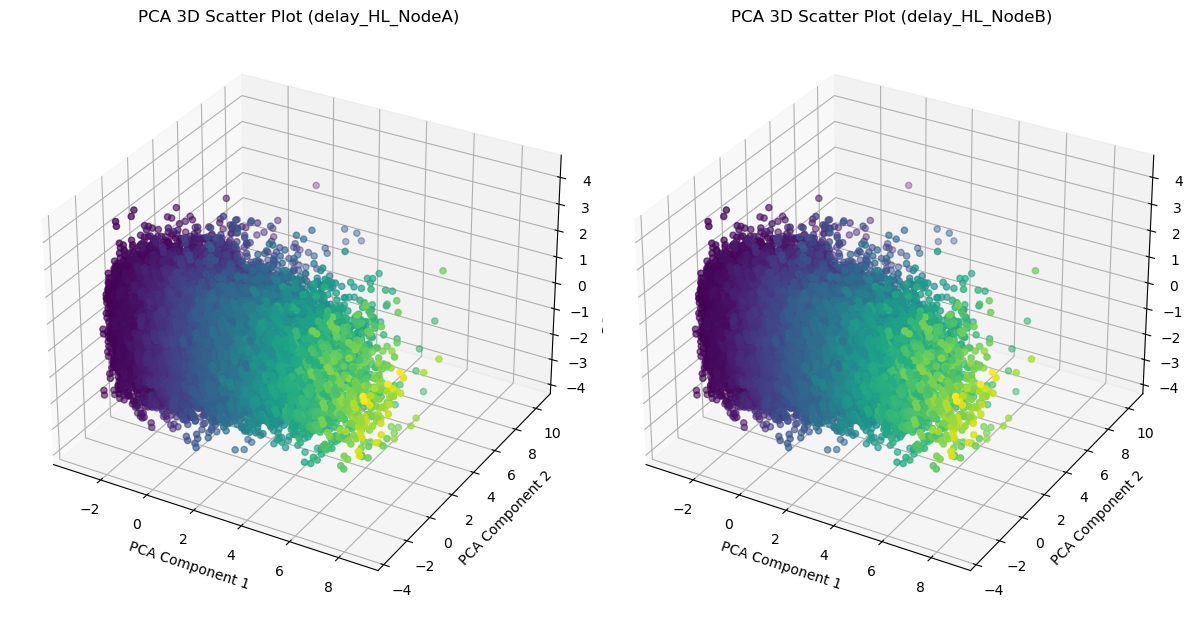

In [24]:
fig = plt.figure(figsize=(12, 8))

# Subplot 1
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(pca_df['PCA_1'], pca_df['PCA_2'], pca_df['PCA_3'], c=scaled_data['delay_LH_NodeA'], cmap='viridis')
ax1.set_title('PCA 3D Scatter Plot (delay_HL_NodeA)')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_zlabel('PCA Component 3')

# Subplot 2
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(pca_df['PCA_1'], pca_df['PCA_2'], pca_df['PCA_3'], c=scaled_data['delay_LH_NodeB'], cmap='viridis')
ax2.set_title('PCA 3D Scatter Plot (delay_HL_NodeB)')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_zlabel('PCA Component 3')
# plt.colorbar(scatter2, ax=ax2, label='Delay HL NodeB')

plt.tight_layout()
plt.show()


#### PCA Columns relationship with the original columns

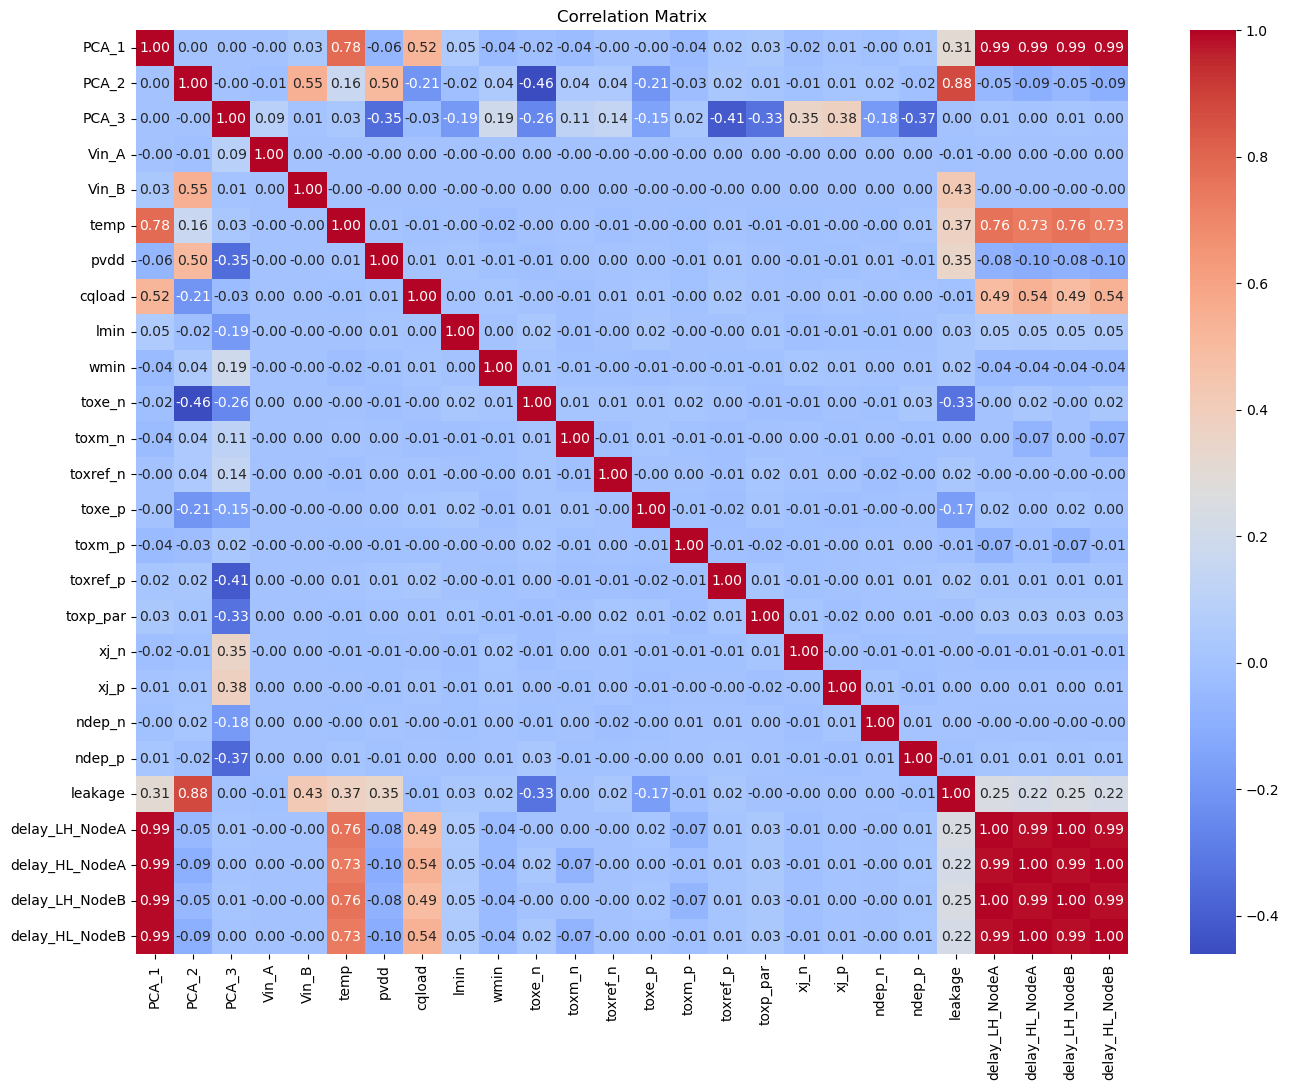

In [25]:
# Calculate the correlation matrix between PCA components and original features
pca_original_corr = pd.concat([pca_df, scaled_data], axis=1).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(pca_original_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [19]:
# Find the columns with the highest absolute correlation with each PCA component
most_correlated_pca1 = pca_original_corr['PCA_1'].abs().sort_values(ascending=False).head(5)
most_correlated_pca2 = pca_original_corr['PCA_2'].abs().sort_values(ascending=False).head(5)
most_correlated_pca3 = pca_original_corr['PCA_3'].abs().sort_values(ascending=False).head(5)

print("Most correlated columns with PCA Component 1:")
print(most_correlated_pca1)
print("\nMost correlated columns with PCA Component 2:")
print(most_correlated_pca2)
print("\nMost correlated columns with PCA Component 3:")
print(most_correlated_pca3)

NameError: name 'pca_original_corr' is not defined

In [ ]:
from sklearn.manifold import TSNE

# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=3, perplexity=30, random_state=42)

# Fit and transform the data using t-SNE
tsne_result = tsne.fit_transform(scaled_data)

In [ ]:
# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['tsne_1', 'tsne_2', 'tsne_3'])

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Extract the reduced components
x = pca_df['tsne_1']
y = pca_df['tsne_2']
z = pca_df['tsne_3']

# Plot the data points
ax.scatter(x, y, z, c='pink', marker='o', label='Data Points')

# Set labels and title
ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
ax.set_zlabel('tsne_3')
ax.set_title('TSNE - 3D Scatter Plot')

ax.legend()
plt.show()

### Regression Analysis


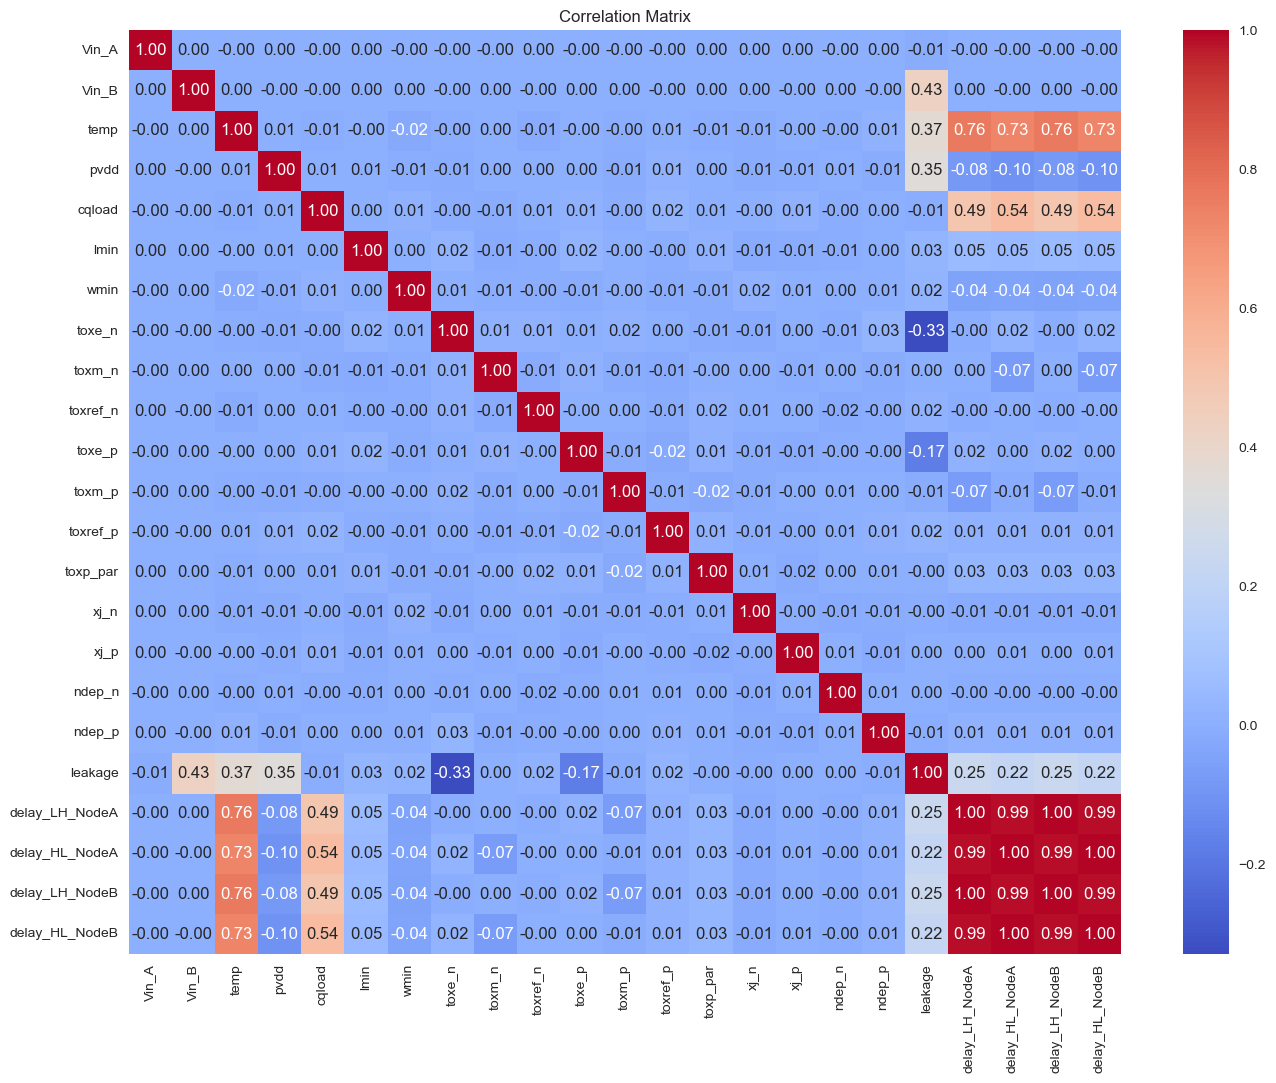

In [46]:
# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check for multicollinearity
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Selecting only numerical columns for VIF calculation
numerical_features = scaled_data.select_dtypes(include=[np.number])

In [30]:
vif = calculate_vif(numerical_features)
vif

feature       VIF
0            Vin_A  1.000204
1            Vin_B  1.434859
2             temp  5.221560
3             pvdd  1.386186
4           cqload  3.299692
5             lmin  1.022073
6             wmin  1.011922
7           toxe_n  1.301805
8           toxm_n  1.542579
9         toxref_n  1.003040
10          toxe_p  1.096599
11          toxm_p  1.315078
12        toxref_p  1.002153
13        toxp_par  1.009235
14            xj_n  1.001661
15            xj_p  1.001050
16          ndep_n  1.000919
17          ndep_p  1.001515
18         leakage  2.368838
19  delay_LH_NodeA       inf
20  delay_HL_NodeA       inf
21  delay_LH_NodeB       inf
22  delay_HL_NodeB       inf

#### Inferences

The output shows the Variance Inflation Factor (VIF) for each feature in your dataset. The VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated.

In this output:

Features with VIF values close to 1 indicate low multicollinearity.
Features with VIF values significantly higher than 1 may have multicollinearity issues.
Based on the provided VIF values:

Columns pvdd, lmin, wmin, toxe_n, toxm_n, toxref_n, toxe_p, toxm_p, toxref_p, toxp_par, xj_n, xj_p, ndep_n, ndep_p, leakage, delay_LH_NodeA, and Vin_A and Vin_B have VIF values close to 1, indicating low multicollinearity.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
scaled_data.columns

Index(['Vin_A', 'Vin_B', 'temp', 'pvdd', 'cqload', 'lmin', 'wmin', 'toxe_n',
       'toxm_n', 'toxref_n', 'toxe_p', 'toxm_p', 'toxref_p', 'toxp_par',
       'xj_n', 'xj_p', 'ndep_n', 'ndep_p', 'leakage', 'delay_LH_NodeA',
       'delay_HL_NodeA', 'delay_LH_NodeB', 'delay_HL_NodeB'],
      dtype='object')

In [22]:
X = scaled_data.drop(columns=['leakage', 'delay_LH_NodeA',	'delay_HL_NodeA',	'delay_LH_NodeB',	'delay_HL_NodeB'])
y = scaled_data[['leakage', 'delay_LH_NodeA',	'delay_HL_NodeA',	'delay_LH_NodeB',	'delay_HL_NodeB']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train a regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1993953909091707


In [27]:
# r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.7975442580715583


The Mean Squared Error value represents the average squared difference between the actual target values and the predicted values obtained from the regression model. In this case, the MSE value is extremely small, approximately 2.62e-17, which indicates very low error between the predicted and actual values. This suggests that the regression model fits the data very well and has excellent predictive performance.